# Neural Network - 2 Layer

Let's see whether the data is atleast learnable by Neural Networks
- Predict just 1 day using 15 days input
- Predict 15 days using 15 days input



In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pandas.tools.plotting import autocorrelation_plot
matplotlib.style.use('ggplot')
pd.set_option("display.max_rows",10)
plt.rcParams["figure.figsize"]  = [10,7] # width, height

## Splitting the data into training, testing, and validation sets


In [2]:
data = pd.read_pickle("cff_15dayperiod.pkl")
data.shape

(5313, 31)

In [3]:
data

shop_id input_foot_traffic                                            \
day                           0      1      2      3      4      5      6   
0          1              268.0  218.0  224.0  260.0  267.0  243.0  272.0   
1          1              225.0  264.0  233.0  424.0  419.0  539.0  267.0   
2          1              257.0  272.0  267.0  310.0  261.0  253.0  266.0   
3          1              304.0  320.0  419.0  397.0  393.0  349.0  393.0   
4          1              337.0  238.0  352.0  339.0  356.0  230.0  254.0   
...      ...                ...    ...    ...    ...    ...    ...    ...   
5308    1999              358.0  329.0  352.0  298.0  333.0  332.0  380.0   
5309    2000              149.0  185.0  129.0   76.0   61.0  186.0  160.0   
5310    2000               43.0   39.0  190.0  131.0  185.0  207.0  163.0   
5311    2000              170.0  160.0  187.0  142.0   53.0   70.0  162.0   
5312    2000               38.0   80.0   79.0  174.0  200.0  196.0  187.0   

                    ...   output_foot_traffic                              \
day       7      8  ...                     5      6      7      8      9   
0     320.0  262.0  ...                 272.0  320.0  262.0  275.0  297.0   
1     282.0  302.0  ...                 267.0  282.0  302.0  343.0  265.0   
2     281.0  272.0  ...                 266.0  281.0  272.0  288.0  353.0   
3     364.0  317.0  ...                 393.0  364.0  317.0  383.0  364.0   
4     226.0  242.0  ...                 254.0  226.0  242.0  272.0  297.0   
...     ...    ...  ...                   ...    ...    ...    ...    ...   
5308  532.0  565.0  ...                 380.0  532.0  565.0  330.0  301.0   
5309  191.0  161.0  ...                 160.0  191.0  161.0  160.0   43.0   
5310   80.0   63.0  ...                 163.0   80.0   63.0  188.0  216.0   
5311  182.0  138.0  ...                 162.0  182.0  138.0  127.0  159.0   
5312  192.0  212.0  ...                 187.0  192.0  212.0  162.0   87.0   

                                         
day      10     11     12     13     14  
0     243.0  220.0  237.0  265.0  288.0  
1     284.0  273.0  294.0  285.0  257.0  
2     322.0  332.0  302.0  296.0  304.0  
3     337.0  296.0  312.0  339.0  337.0  
4     258.0  250.0  254.0  194.0  206.0  
...     ...    ...    ...    ...    ...  
5308  307.0  303.0  364.0  477.0  458.0  
5309   59.0  170.0  111.0  133.0  144.0  
5310  169.0  184.0  161.0   53.0   76.0  
5311   43.0   43.0   53.0   37.0   38.0  
5312   64.0  179.0  175.0  178.0  200.0  

[5313 rows x 31 columns]

In [4]:
X = data.loc[:,'input_foot_traffic']
y = data.loc[:,'output_foot_traffic']

In [5]:
X

day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,268.0,218.0,224.0,260.0,267.0,243.0,272.0,320.0,262.0,275.0,297.0,243.0,220.0,237.0,265.0
1,225.0,264.0,233.0,424.0,419.0,539.0,267.0,282.0,302.0,343.0,265.0,284.0,273.0,294.0,285.0
2,257.0,272.0,267.0,310.0,261.0,253.0,266.0,281.0,272.0,288.0,353.0,322.0,332.0,302.0,296.0
3,304.0,320.0,419.0,397.0,393.0,349.0,393.0,364.0,317.0,383.0,364.0,337.0,296.0,312.0,339.0
4,337.0,238.0,352.0,339.0,356.0,230.0,254.0,226.0,242.0,272.0,297.0,258.0,250.0,254.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,358.0,329.0,352.0,298.0,333.0,332.0,380.0,532.0,565.0,330.0,301.0,307.0,303.0,364.0,477.0
5309,149.0,185.0,129.0,76.0,61.0,186.0,160.0,191.0,161.0,160.0,43.0,59.0,170.0,111.0,133.0
5310,43.0,39.0,190.0,131.0,185.0,207.0,163.0,80.0,63.0,188.0,216.0,169.0,184.0,161.0,53.0
5311,170.0,160.0,187.0,142.0,53.0,70.0,162.0,182.0,138.0,127.0,159.0,43.0,43.0,53.0,37.0


In [6]:
y

day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,218.0,224.0,260.0,267.0,243.0,272.0,320.0,262.0,275.0,297.0,243.0,220.0,237.0,265.0,288.0
1,264.0,233.0,424.0,419.0,539.0,267.0,282.0,302.0,343.0,265.0,284.0,273.0,294.0,285.0,257.0
2,272.0,267.0,310.0,261.0,253.0,266.0,281.0,272.0,288.0,353.0,322.0,332.0,302.0,296.0,304.0
3,320.0,419.0,397.0,393.0,349.0,393.0,364.0,317.0,383.0,364.0,337.0,296.0,312.0,339.0,337.0
4,238.0,352.0,339.0,356.0,230.0,254.0,226.0,242.0,272.0,297.0,258.0,250.0,254.0,194.0,206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,329.0,352.0,298.0,333.0,332.0,380.0,532.0,565.0,330.0,301.0,307.0,303.0,364.0,477.0,458.0
5309,185.0,129.0,76.0,61.0,186.0,160.0,191.0,161.0,160.0,43.0,59.0,170.0,111.0,133.0,144.0
5310,39.0,190.0,131.0,185.0,207.0,163.0,80.0,63.0,188.0,216.0,169.0,184.0,161.0,53.0,76.0
5311,160.0,187.0,142.0,53.0,70.0,162.0,182.0,138.0,127.0,159.0,43.0,43.0,53.0,37.0,38.0


In [7]:
train_count = int(X.shape[0] * 0.75)
valid_count = X.shape[0] - train_count

In [8]:
X_valid = X[train_count:].values
X_train = X[:train_count].values

y_valid = y[train_count:].values
y_train = y[:train_count].values

X_train_index = list(X[:train_count].index)

In [9]:
X_train

array([[ 268.,  218.,  224., ...,  220.,  237.,  265.],
       [ 225.,  264.,  233., ...,  273.,  294.,  285.],
       [ 257.,  272.,  267., ...,  332.,  302.,  296.],
       ..., 
       [  75.,   98.,  137., ...,  116.,  137.,  126.],
       [ 101.,   74.,   81., ...,   72.,   67.,  105.],
       [ 137.,  183.,  145., ...,  132.,  123.,  143.]])

## Visualize 15 days data

Let's see if there is any observable pattern for 15 days of data between stores 

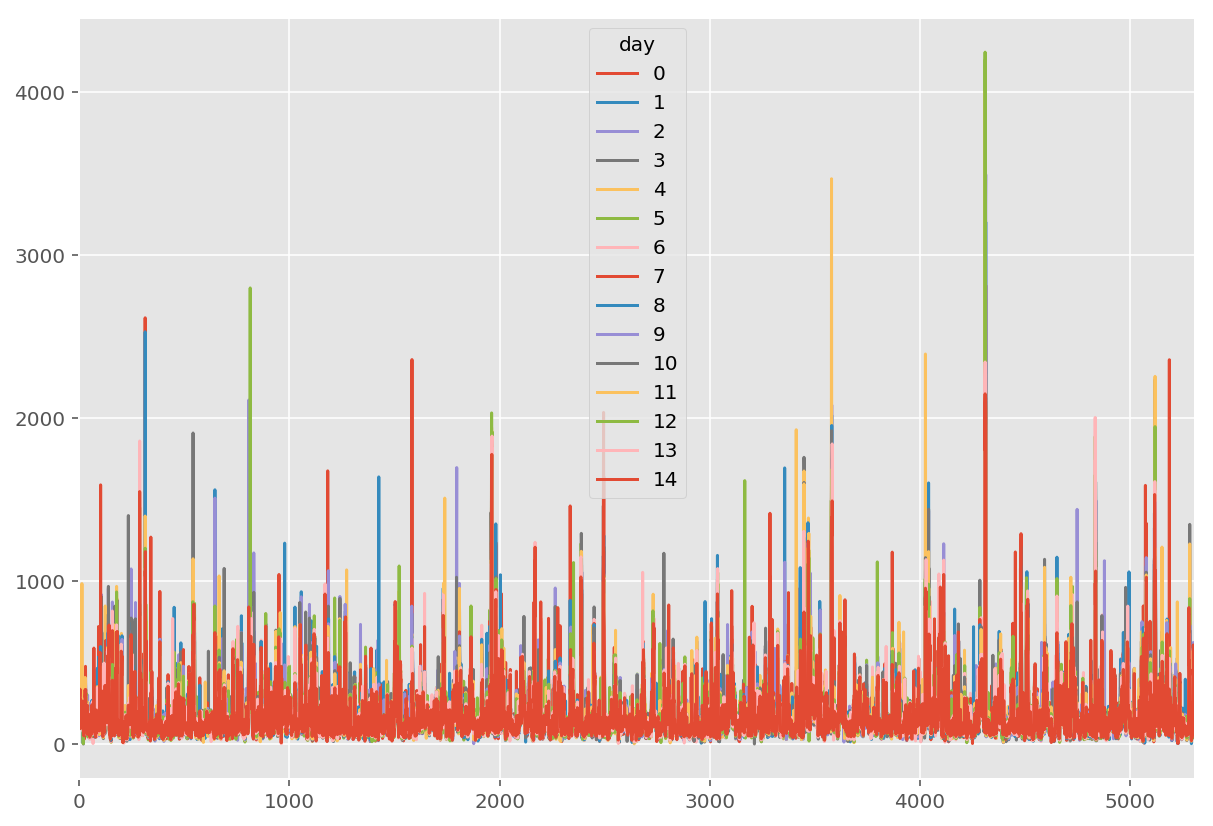

In [10]:
X.plot()

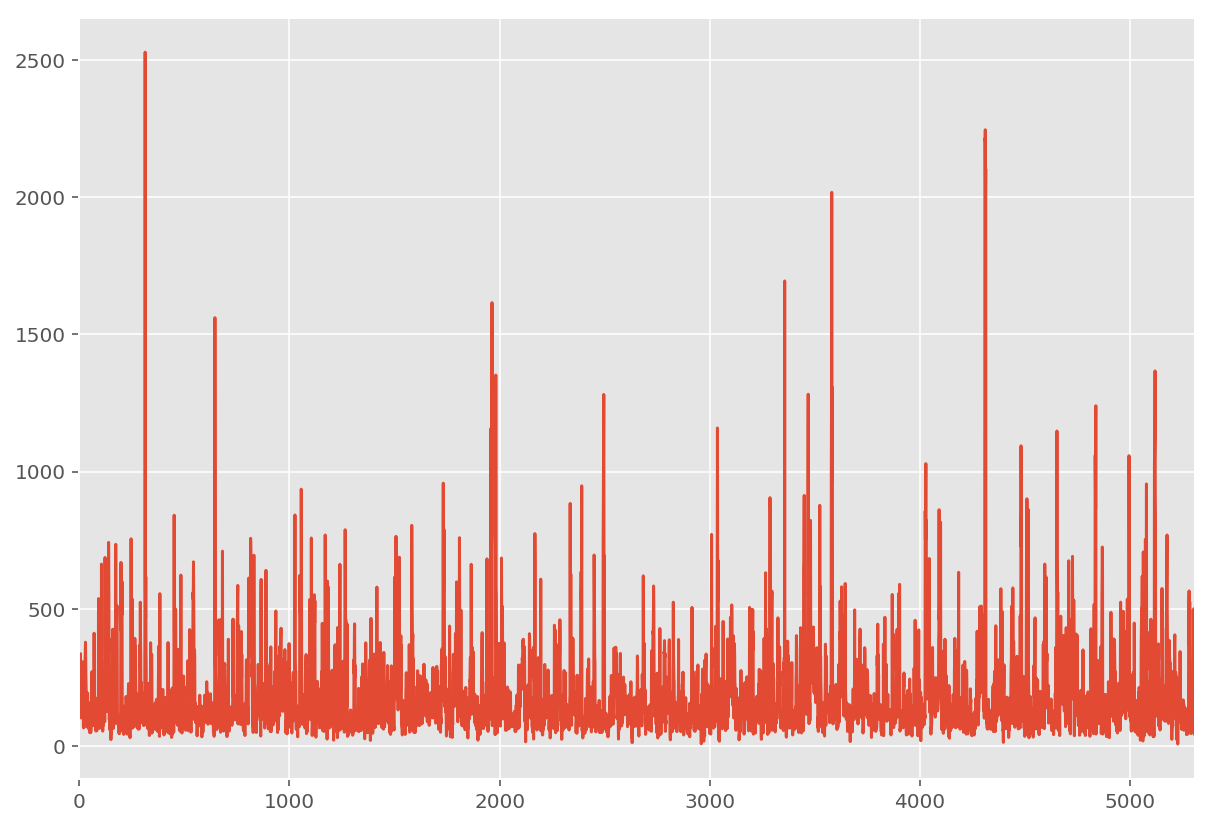

In [11]:
y[0].plot()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
    
def fetch_data():
    n = StandardScaler()
    
    norm = n.fit_transform(np.hstack((X.values, y.iloc[:,0:output_nodes_num].values)) )
    
    X_norm = norm[:,:-1]
    y_norm = norm[:,-1][:,None ]
    
    X_train, X_valid, y_train, y_valid = train_test_split(
    X_norm, y_norm , test_size=0.25, random_state=42)
    
    return X_train, X_valid, y_train, y_valid

In [13]:
import tensorflow as tf
sess = tf.InteractiveSession()


## Network Model

In [14]:

input_nodes_num = 15
output_nodes_num = 1

tf_x = tf.placeholder(tf.float32, [None, input_nodes_num],name='Inputs')
tf_y_ = tf.placeholder(tf.float32, [None, output_nodes_num], name='ActualOutput')

tf_W = tf.Variable(tf.truncated_normal([input_nodes_num, output_nodes_num]),name='Weights')

tf_b = tf.Variable(tf.zeros([output_nodes_num]),name='bias')

tf_y = tf.add(tf.matmul(tf_x, tf_W), tf_b)

tf_y_predict_ = tf.add(tf.matmul(tf_x, tf_W), tf_b)

sq_diff = 0.5 * tf.reduce_sum(tf.squared_difference( tf_y_ , tf_y), name = "Squared_Difference") / 200
sq_diff_valid = 0.5 * tf.reduce_sum(tf.squared_difference( tf_y_predict_ , tf_y), name = "Squared_Difference") / 200

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(sq_diff)


In [15]:
X_train, X_valid, y_train, y_valid = fetch_data()

In [16]:
X_valid.shape

(1329, 15)

In [17]:
y_valid.shape

(1329, 1)

## Training the Network

Training (part of dataset) - epoch:0, loss:0.8551790118217468
Training (whole dataset) - epoch:0, loss:19.130416870117188
Validation - epoch:0, loss:9.014347076416016
****
Training (part of dataset) - epoch:200, loss:0.3369677662849426
Training (whole dataset) - epoch:200, loss:8.524874687194824
Validation - epoch:200, loss:4.012039661407471
****
Training (part of dataset) - epoch:400, loss:0.17144542932510376
Training (whole dataset) - epoch:400, loss:5.043277740478516
Validation - epoch:400, loss:2.273702383041382
****
Training (part of dataset) - epoch:600, loss:0.29951873421669006
Training (whole dataset) - epoch:600, loss:3.4632372856140137
Validation - epoch:600, loss:1.5269640684127808
****
Training (part of dataset) - epoch:800, loss:0.1328062266111374
Training (whole dataset) - epoch:800, loss:2.471323013305664
Validation - epoch:800, loss:1.0669832229614258
****
Training (part of dataset) - epoch:1000, loss:0.065409816801548
Training (whole dataset) - epoch:1000, loss:1.84006

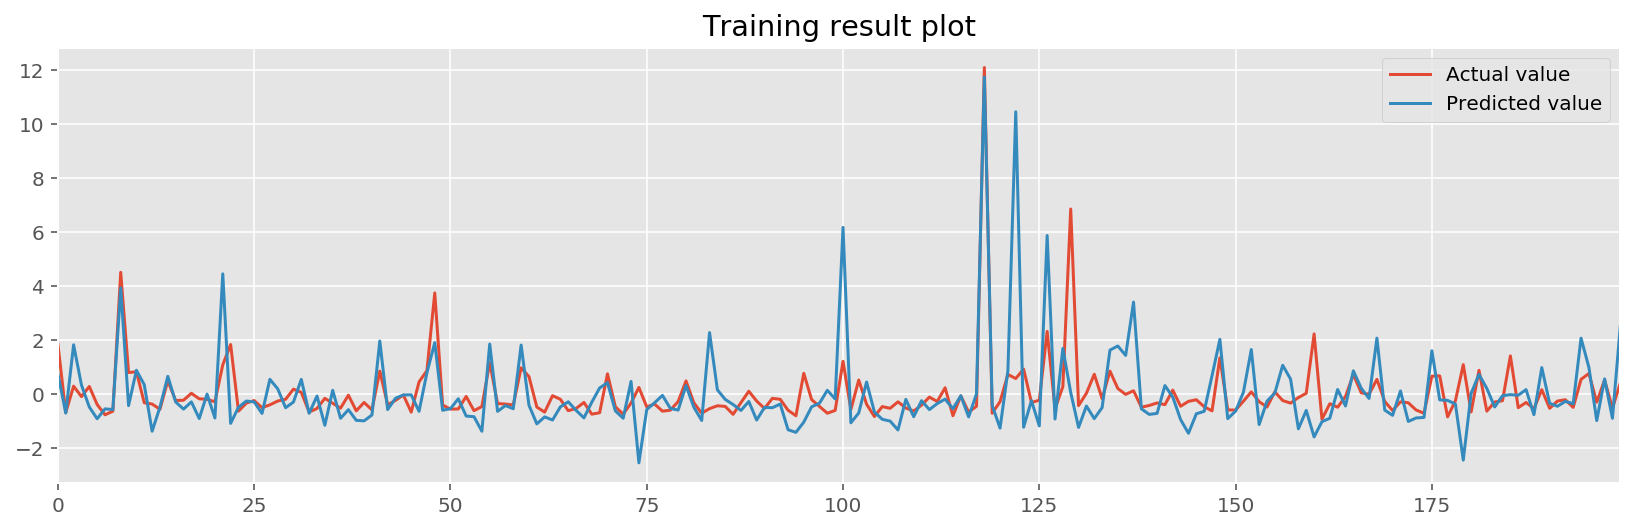

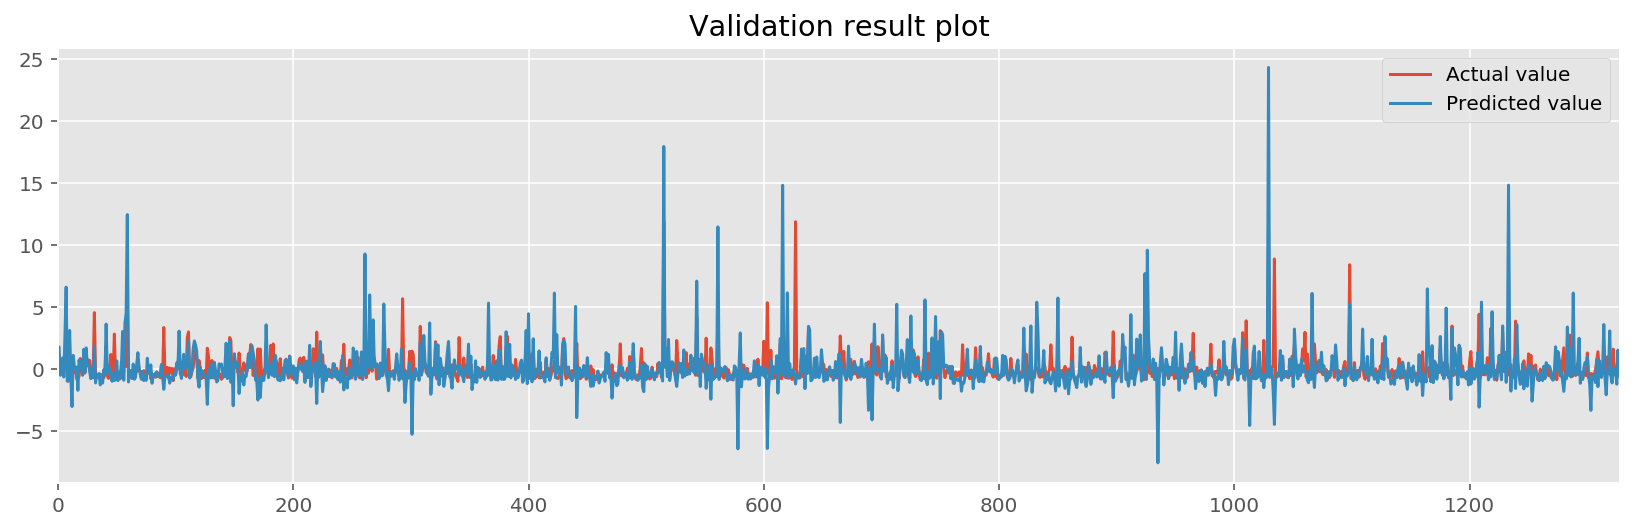

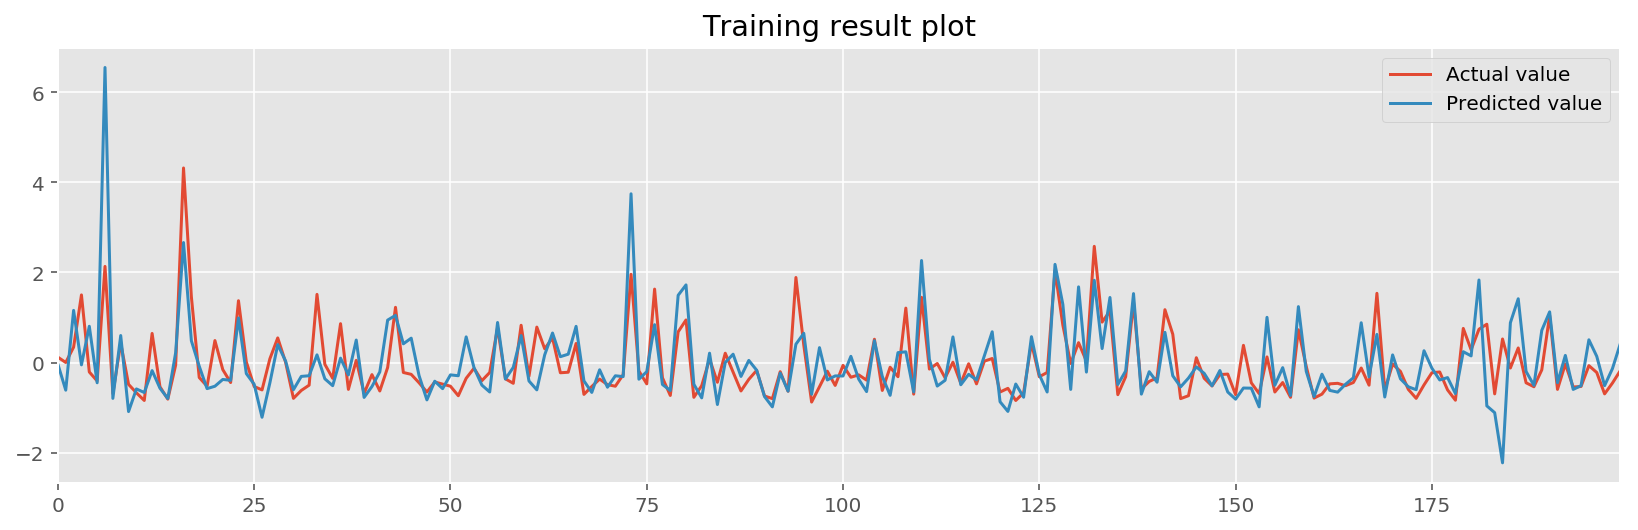

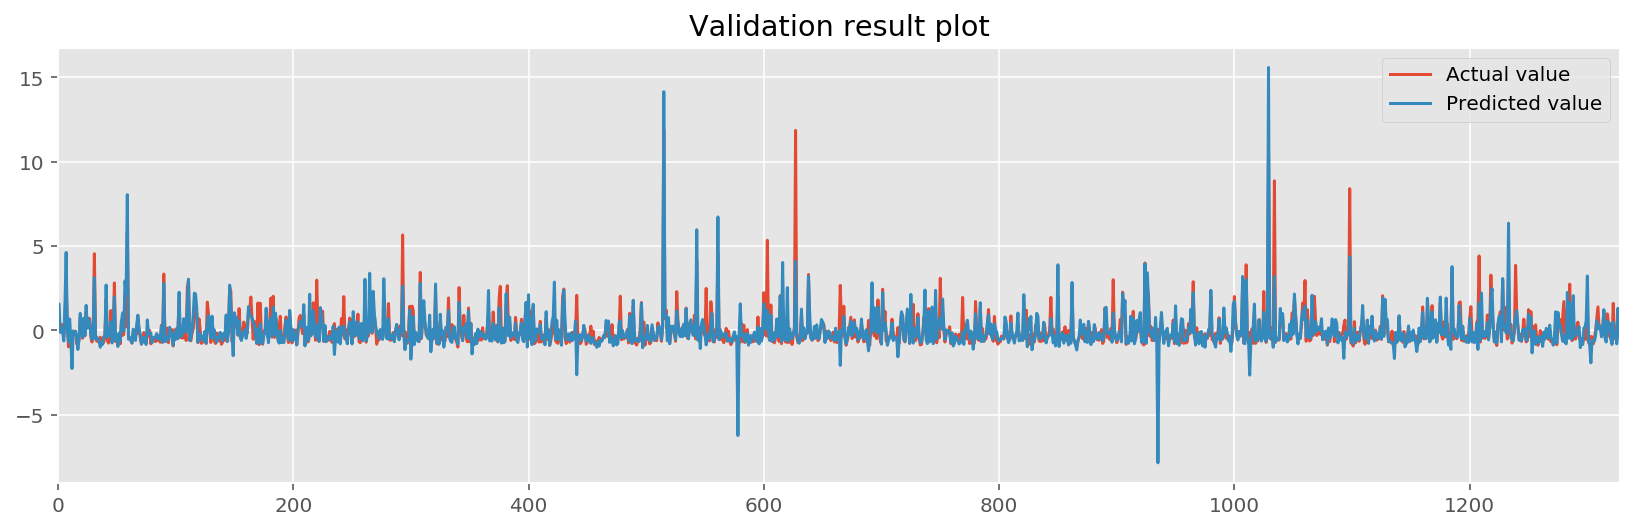

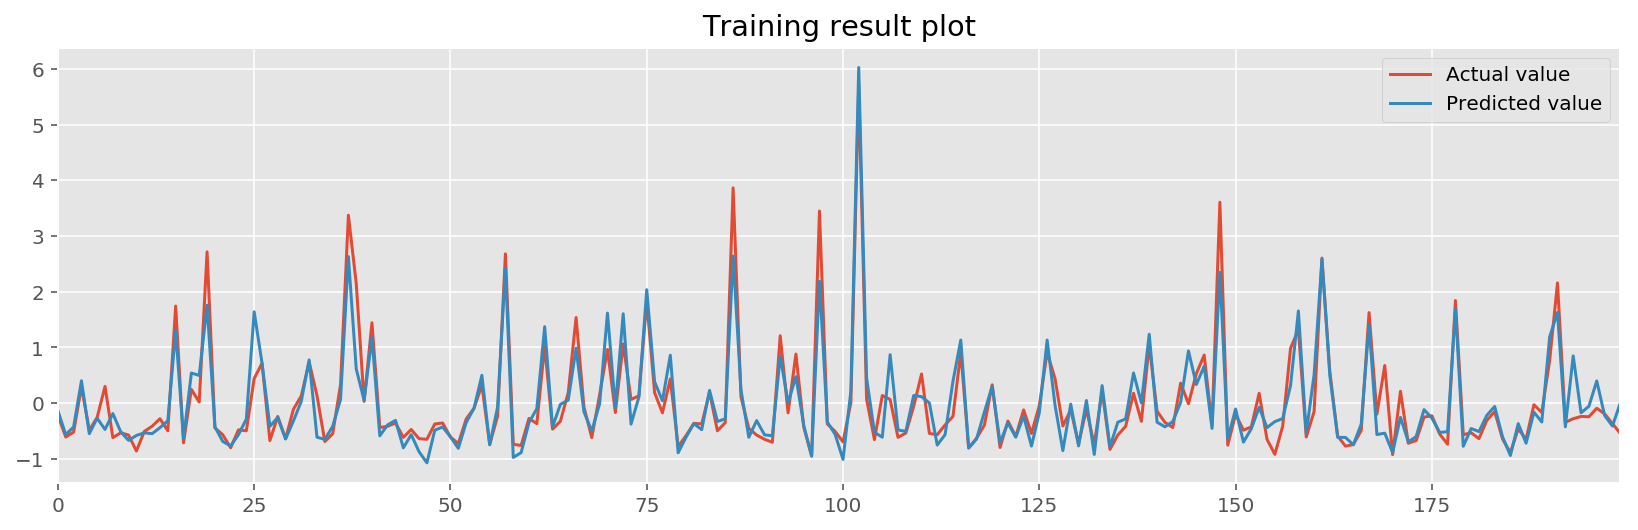

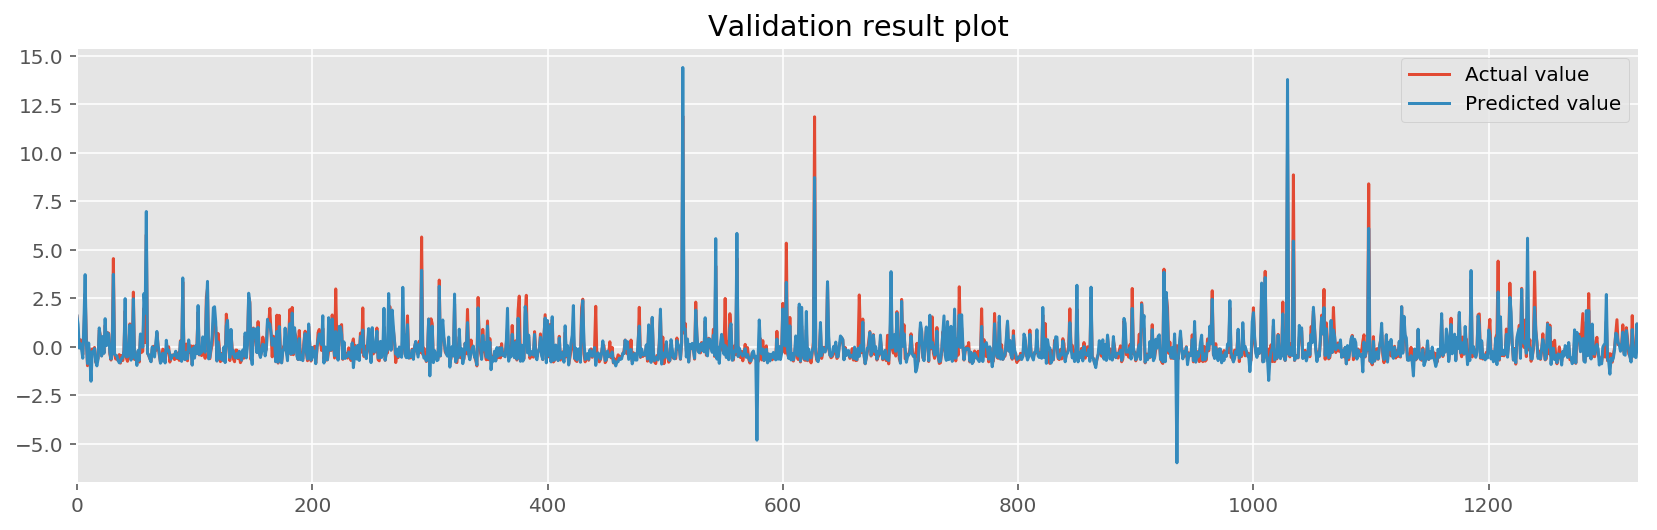

In [18]:
tf.initialize_all_variables().run()

losses = {'train':[], 'validation':[]}

for i in range(1001):
    index = np.random.randint(size=200,low = 0, high = X_train.shape[0])
    batch_xs = X_train[index,:]
    batch_ys = y_train[index,:]
    _, tr_y, tr_sq_diff = sess.run([train_step, tf_y, sq_diff], feed_dict={tf_x: batch_xs, tf_y_:batch_ys })
    
    tv_y = tf_y_predict_.eval(feed_dict={tf_x: X_valid})
    vd_sq_diff = sq_diff_valid.eval(feed_dict={tf_x: X_valid, tf_y:y_valid})
    
    
    if i % 200 == 0:
        print ("Training (part of dataset) - epoch:{}, loss:{}".format(i, tr_sq_diff))
        tr_sq_diff = sess.run(sq_diff, feed_dict={tf_x: X_train, tf_y_: y_train})
        print ("Training (whole dataset) - epoch:{}, loss:{}".format(i, tr_sq_diff))
        
        losses['train'].append(tr_sq_diff)
        losses['validation'].append(vd_sq_diff)
        
        print("Validation - epoch:{}, loss:{}".format(i, vd_sq_diff))
        print("****")

    if i % 500 == 0:

        answer_train = pd.DataFrame({"Predicted value":tr_y[:,0], "Actual value":batch_ys[:,0]})
        answer_train.plot(title='Training result plot', figsize=[14,4])

        answer_valid = pd.DataFrame({"Predicted value":tv_y[:,0], "Actual value":y_valid[:,0]})
        answer_valid.plot(title = 'Validation result plot', figsize=[14,4])

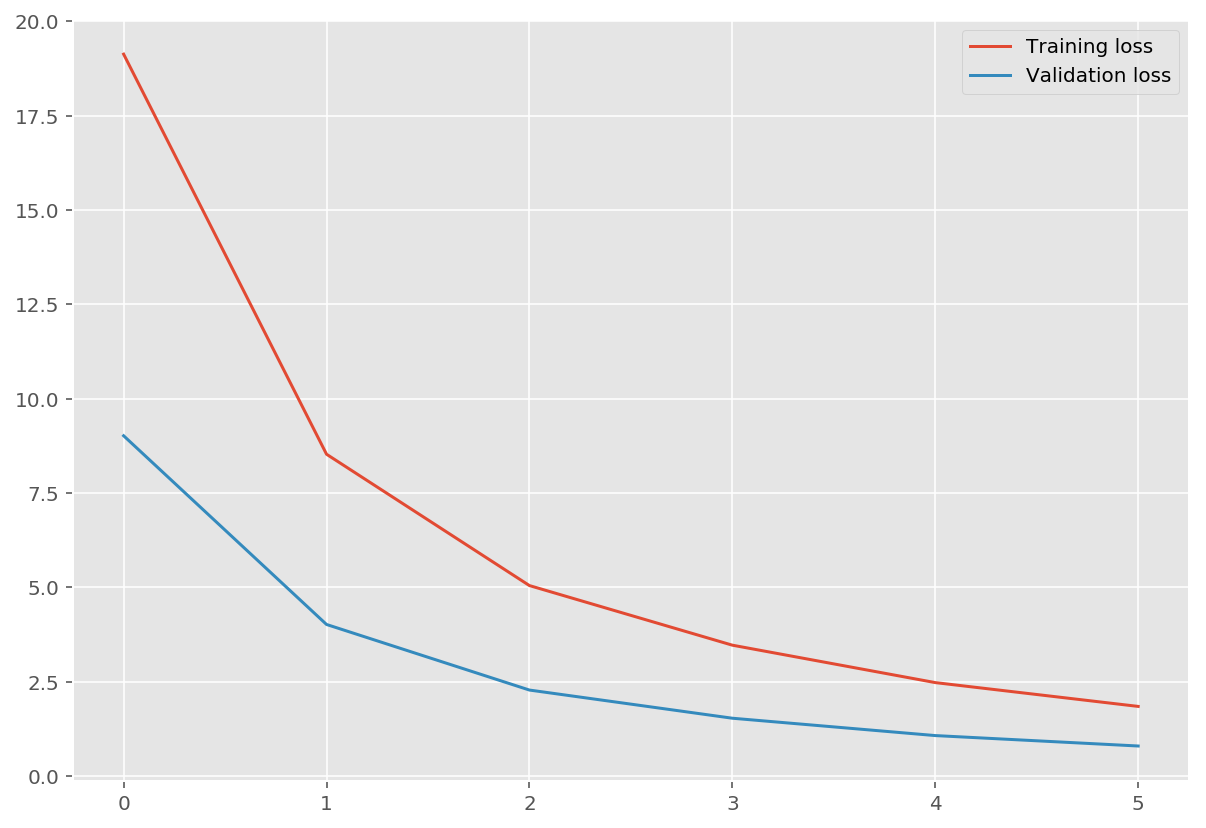

In [19]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
#plt.ylim(ymax=0.5)